
<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> I. Introduction </b></div>

Dans ce projet, notre exploration se concentrera sur le jeu de données **Natural Images**, disponible en open source sur Kaggle à l'adresse [Natural Images](https://www.kaggle.com/datasets/prasunroy/natural-images). 

Ce jeu de données comprend 6,899 images réparties en 8 classes distinctes, à savoir avion, voiture, chat, chien, fleur, fruit, moto et personne.

Pour aborder ce défi, nous ferons principalement usage de deux approches de pointe en apprentissage profond : les réseaux de neurones convolutifs (CNN) et le Transfert Learning. Ces techniques, considérées comme l'état de l'art actuel, nous permettront d'extraire des caractéristiques pertinentes des images et d'optimiser la performance de notre modèle pour la classification des différentes classes du jeu de données.


# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Rapport Projet Deep Learning  </center>
## <center style="color:red"> Exploration et Classification d'Images Naturelles avec des Réseaux Neuronaux Convolutifs (CNN) </center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">  Mustapha OUYAAZ </center></p>
​

***

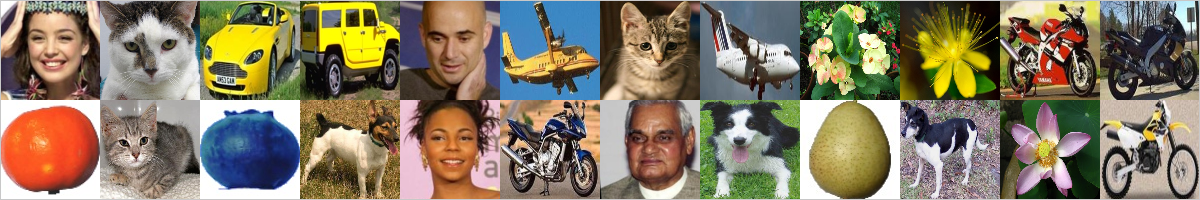

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> II. Prétraitement des données    </b></div>

## Importations des données 

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# Chemin du dossier contenant les images
chemin = 'natural images'
data = []
# Chargement des images
for filename in os.listdir(chemin):
    if filename.endswith(".jpg"):
        image_path = os.path.join(chemin, filename)
        image = load_img(image_path, target_size=(100, 100))
        image = img_to_array(image)
        data.append(image)
# Conversion en tableau numpy
data = np.array(data)

### Étiquetage des Images :





<h1><font size="3"><span style="color:black">Chaque image est associée à une catégorie spécifique, représentant des classes distinctes telles que  `airplane`, `car`, `cat`, `dog`, `flower`, `fruit`, `motorbike`, `person`.</span></font></h1>

In [3]:
labels = []
for filename in os.listdir(chemin):
    if filename.endswith(".jpg"):
        # Extraction du label à partir du nom de fichier
        label = filename.split("_")[0]
        labels.append(label)
# Conversion en tableau numpy
labels = np.array(labels)

### Infos sur les Images :

In [4]:
print(f"le jeu de données contient {len(data)} images")

le jeu de données contient 6899 images


In [5]:
# Le nombre de photos dans chaque classe
print(f"{np.sum(labels == 'dog')} images de chiens")
print(f"{np.sum(labels == 'airplane')} images d'avions")
print(f"{np.sum(labels == 'car')} images de voitures")
print(f"{np.sum(labels == 'cat')} images de chats")
print(f"{np.sum(labels == 'flower')} images de fleures")
print(f"{np.sum(labels == 'person')} images de personnes")
print(f"{np.sum(labels == 'motorbike')} images de motos")
print(f"{np.sum(labels == 'fruit')} images de fruits")

702 images de chiens
727 images d'avions
968 images de voitures
885 images de chats
843 images de fleures
986 images de personnes
788 images de motos
1000 images de fruits


### Normalisation des données d'images

__L'objectif est de mettre à l'échelle les valeurs des pixels pour qu'elles se situent dans une plage plus petite, généralement entre 0 et 1.__



In [6]:
data = data / 255

### Affichage des images

<Figure size 1000x2400 with 0 Axes>

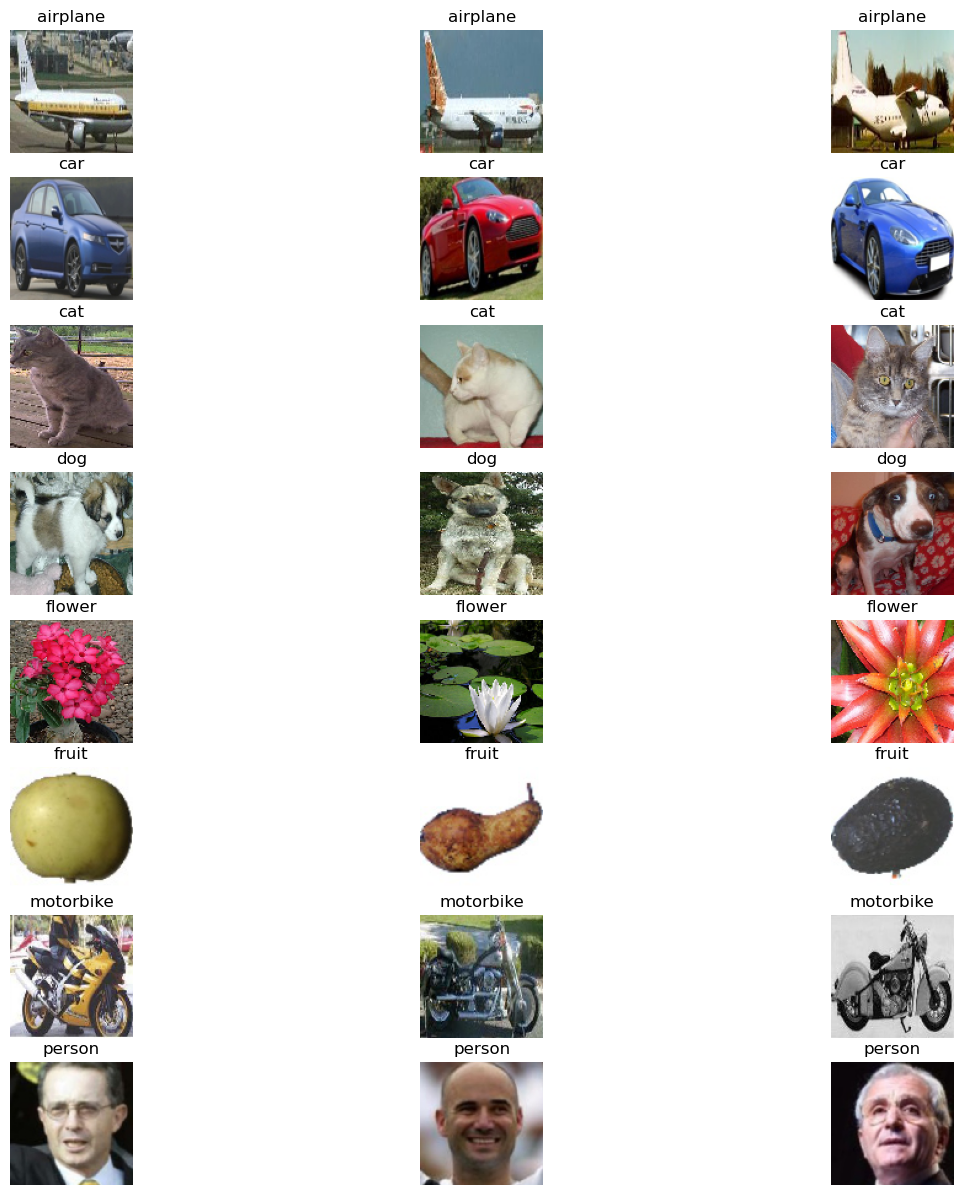

In [7]:
classes, indices = np.unique(labels, return_index=True)
# Créez une figure pour l'affichage
plt.figure(figsize=(10, len(classes) * 3))
fig = plt.figure(figsize=(15,15))
for i, classe in enumerate(classes):
    # indices où la classe est égale au label actuel
    class_indices = np.where(labels == classe)[0]
    # 3 indices au hasard parmi ceux de la classe
    selected_indices = np.random.choice(class_indices, 3, replace=False)
    
    for j, indice in enumerate(selected_indices):
        # Calculez l'emplacement de la sous-parcelle
        plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(data[indice])
        plt.title(classe)
        plt.axis('off')
        
plt.show()

### Division des données en ensembles d'entraînement et de test


<h1><font size="3"><span style="color:black">Pour garantir une bonne évaluation de la performance de notre modèle, nous avons divisé notre ensemble de données en deux parties distinctes : l'ensemble d'entraînement et l'ensemble de test</span></font></h1>

In [8]:
from sklearn.model_selection import train_test_split

r = np.arange(data.shape[0])
np.random.seed(35)
np.random.shuffle(r)
X = data[r]
Y = labels[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [9]:
X_train.shape

(4829, 100, 100, 3)

In [10]:
X_test.shape

(2070, 100, 100, 3)

<h1><font size="3"><span style="color:black">Afin de préparer nos étiquettes pour une tâche de classification multiclasse, nous avons utilisé la fonction to_categorical de la bibliothèque TensorFlow. Cette étape d'encodage transforme nos étiquettes en un format adapté à la classification multiclasse.</span></font></h1>

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.fit_transform(Y_test)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> III. Construction du modèle CNN    </b></div>

 

## CNN - Covolutional Neural Network




<h1><font size="3"><span style="color:black">Dans cette section, nous définissons plusieurs modèle de réseau neuronal convolutif (CNN) pour la classification d'images. Le premier modèle est très simple avec une couche convolutive et une couche maxpooling. Ensuite un deuxième modèle plus compliqué avec 4 couches convolutives et 4 de maxpooling. Enfin on reprend le même modèle mais cette fois-ci nous allons utiliser la fonction Dropout pour éviter un éventuel problème de surapprentissage. Chaque couche convolutive est dotée de l'activation ReLU. Après plusieurs niveaux de convolution et de pooling, la représentation est aplatie(`Flatten()`) et passée à travers des couches denses pour la classification finale. La dernière couche, utilisant l'activation softmax, distribue les probabilités à travers les différentes classes possibles, permettant ainsi au modèle de prédire la classe d'une image donnée. Chacun de ces modèles sera entraîné sur 20 époques.
</span></font></h1>

<img src="https://github.com/MorganGautherot/Tuto_MRI_ML/blob/master/tp_1/data/convolution_anim.gif?raw=1" width="800" >

### Modèle 1

In [53]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation="relu"))
model1.add(layers.Dense(8, activation="softmax"))

In [54]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 76832)             0         
                                                                 
 dense_16 (Dense)            (None, 64)                4917312   
                                                                 
 dense_17 (Dense)            (None, 8)                 520       
                                                                 
Total params: 4918728 (18.76 MB)
Trainable params: 4918728 (18.76 MB)
Non-trainable params: 0 (0.00 Byte)
______________

<h1><font size="3"><span style="color:black">Dans le processus de compilation de notre modèle de réseau de neurones convolutif, nous avons choisi d'utiliser la fonction de perte categorical_crossentropy, L'optimiseur RMSprop et nous avons configuré notre modèle pour surveiller la précision comme métrique clé, ce qui nous fournira un indicateur direct de la performance du modèle sur les données d'entraînement et de validation au fur et à mesure de son apprentissage.</span></font></h1>

In [55]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='RMSprop',
              metrics=['accuracy'])

In [56]:
history1 = model1.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split = 0.20)

Epoch 1/20
31/31 [==============================] - 4s 119ms/step - loss: 3.3201 - accuracy: 0.5708 - val_loss: 0.7743 - val_accuracy: 0.7536
Epoch 2/20
31/31 [==============================] - 3s 110ms/step - loss: 0.6763 - accuracy: 0.7818 - val_loss: 0.7170 - val_accuracy: 0.7340
Epoch 3/20
31/31 [==============================] - 3s 109ms/step - loss: 0.4466 - accuracy: 0.8499 - val_loss: 0.6639 - val_accuracy: 0.7857
Epoch 4/20
31/31 [==============================] - 3s 107ms/step - loss: 0.3502 - accuracy: 0.8923 - val_loss: 0.5417 - val_accuracy: 0.8292
Epoch 5/20
31/31 [==============================] - 3s 107ms/step - loss: 0.2418 - accuracy: 0.9141 - val_loss: 0.4303 - val_accuracy: 0.8540
Epoch 6/20
31/31 [==============================] - 3s 108ms/step - loss: 0.2053 - accuracy: 0.9420 - val_loss: 0.3420 - val_accuracy: 0.8737
Epoch 7/20
31/31 [==============================] - 3s 110ms/step - loss: 0.2383 - accuracy: 0.9322 - val_loss: 0.3246 - val_accuracy: 0.8841
Epoch 

In [57]:
modeleval1 = model1.evaluate(X_test, Y_test)

65/65 [==============================] - 2s 25ms/step - loss: 0.4163 - accuracy: 0.8942


<h1><font size="3"><span style="color:black">L'évaluation de ce premier modèle sur l'ensemble de test a révélé une perte de 0.4163 et une précision de 89.42%. Ces résultats indiquent que le modèle est assez précis, identifiant correctement près de 9 images sur 10. La perte relativement faible suggère que les prédictions du modèle sont proches des valeurs réelles. Ces indicateurs de performance démontrent que le modèle a appris à bien généraliser les caractéristiques des données d'entraînement pour effectuer des prédictions fiables. Le modèle est donc performant malgré sa simplicité.</span></font></h1>

### Évolution de la Précision pendant l'Entraînement


<h1><font size="3"><span style="color:black">Le graphique ci-dessous présente l'évolution de la précision du modèle au fil des époques d'entraînement.</span></font></h1>

<Figure size 640x480 with 0 Axes>

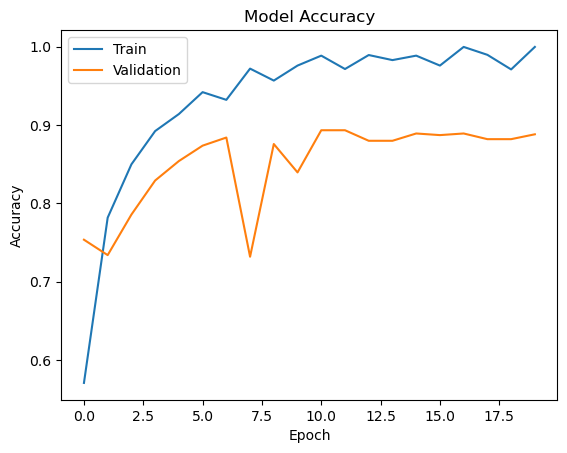

<Figure size 640x480 with 0 Axes>

In [58]:
# Plot validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.figure()

<h1><font size="3"><span style="color:black">Ce graphique montre l'évolution de la précision au fil des époques, on voit que la précision n'évolue plus après 10 époques.</span></font></h1>

### Modèle 2

In [36]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(8, activation="softmax"))

In [38]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='RMSprop',
              metrics='accuracy')

In [39]:
history2 = model2.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split = 0.20)

Epoch 1/20
31/31 [==============================] - 5s 146ms/step - loss: 2.0408 - accuracy: 0.2622 - val_loss: 1.4151 - val_accuracy: 0.4917
Epoch 2/20
31/31 [==============================] - 4s 136ms/step - loss: 1.2975 - accuracy: 0.5467 - val_loss: 1.6425 - val_accuracy: 0.4068
Epoch 3/20
31/31 [==============================] - 4s 136ms/step - loss: 1.0037 - accuracy: 0.6448 - val_loss: 1.3785 - val_accuracy: 0.5859
Epoch 4/20
31/31 [==============================] - 4s 134ms/step - loss: 0.7782 - accuracy: 0.7318 - val_loss: 0.9838 - val_accuracy: 0.6894
Epoch 5/20
31/31 [==============================] - 4s 137ms/step - loss: 0.7146 - accuracy: 0.7626 - val_loss: 1.6954 - val_accuracy: 0.5497
Epoch 6/20
31/31 [==============================] - 4s 141ms/step - loss: 0.5902 - accuracy: 0.7945 - val_loss: 0.7565 - val_accuracy: 0.7505
Epoch 7/20
31/31 [==============================] - 4s 137ms/step - loss: 0.4471 - accuracy: 0.8392 - val_loss: 0.7772 - val_accuracy: 0.7484
Epoch 

In [40]:
modeleval2 = model2.evaluate(X_test, Y_test)

65/65 [==============================] - 1s 11ms/step - loss: 4.5208 - accuracy: 0.6560


<h1><font size="3"><span style="color:black">L'évaluation de ce deuxième modèle CNN sur l'ensemble de test a révélé une perte de 4.528, ce qui est énorme pae rapport au premier modèle. Concernant la précision, le modèle a atteint une performance de 65.60%, indiquant que près de deux tiers des prédictions du modèle étaient correctes. Bien que cette précision soit modeste, elle peut être considérée comme un point de départ pour des améliorations futures, pour cela nous allons garder le même modèle et on va ajouter des instruction pour éviter le surapprentissage.</span></font></h1>

### Modèle 3

In [41]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
model3.add(layers.Dropout(0.4))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model3.add(layers.Dropout(0.4))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model3.add(layers.Dropout(0.4))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation = "relu"))
model3.add(layers.Dropout(0.4))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation="relu"))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(8, activation="softmax"))

In [42]:
model3.compile(loss='categorical_crossentropy', 
              optimizer='RMSprop',
              metrics='accuracy')
history3 = model3.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split = 0.20)

Epoch 1/20
31/31 [==============================] - 9s 245ms/step - loss: 2.5016 - accuracy: 0.2374 - val_loss: 1.9737 - val_accuracy: 0.3292
Epoch 2/20
31/31 [==============================] - 7s 236ms/step - loss: 1.5480 - accuracy: 0.4626 - val_loss: 1.6065 - val_accuracy: 0.6853
Epoch 3/20
31/31 [==============================] - 7s 233ms/step - loss: 1.2866 - accuracy: 0.5866 - val_loss: 1.6017 - val_accuracy: 0.4451
Epoch 4/20
31/31 [==============================] - 7s 229ms/step - loss: 1.0244 - accuracy: 0.6702 - val_loss: 1.1965 - val_accuracy: 0.7360
Epoch 5/20
31/31 [==============================] - 7s 228ms/step - loss: 0.8262 - accuracy: 0.7362 - val_loss: 1.3731 - val_accuracy: 0.4824
Epoch 6/20
31/31 [==============================] - 7s 232ms/step - loss: 0.7012 - accuracy: 0.7763 - val_loss: 0.8548 - val_accuracy: 0.7940
Epoch 7/20
31/31 [==============================] - 7s 229ms/step - loss: 0.7831 - accuracy: 0.7675 - val_loss: 0.8519 - val_accuracy: 0.7433
Epoch 

In [43]:
modeleval3 = model3.evaluate(X_test, Y_test)

65/65 [==============================] - 1s 17ms/step - loss: 0.9179 - accuracy: 0.7246


<h1><font size="3"><span style="color:black">L'évaluation finale du modèle sur l'ensemble de test a donné une perte de 0.9179 et une précision de 72.46%.On remarque ainsi une légère amélioration par rapport au deuxième modèle, mais ce modèle reste quand même beaucoup moins performant que le premier modèle.</span></font></h1>

### Évolution de la Précision pendant l'Entraînement

<Figure size 640x480 with 0 Axes>

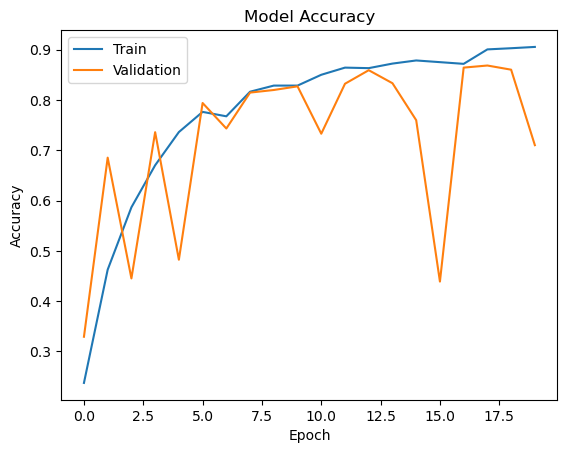

<Figure size 640x480 with 0 Axes>

In [60]:
# Plot validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.figure()

<h1><font size="3"><span style="color:black">Ce graphique montre que la précision semble fluctuer au fil des époques, elle atteint son max à l'époque 16 juste inferieure à 0.9.</span></font></h1>

# Conclusion

<h1><font size="3"><span style="color:black">L'évaluation comparative des modèles montre que le premier modèle a démontré une haute précision (89.42%) et une faible perte (0.4163), le rendant significativement plus performant que les suivants. Le deuxième modèle, malgré une perte considérable (4.528) et une précision modeste (65.60%), a servi de base pour des améliorations qui ont mené à une légère hausse de la performance dans le modèle final (perte de 0.9179 et précision de 72.46%). Cependant, ce dernier reste nettement inférieur au premier modèle en termes d'efficacité.</span></font></h1>


<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> III.  Transfert Learning     </b></div>


<h1><font size="3"><span style="color:black">Dans cette troisième partie, nous abordons la technique de Transfert Learning, une méthode puissante dans le domaine du Deep Learning. Cette approche consiste à utiliser un modèle pré-entraîné sur un grand ensemble de données, tel que VGG16 entraîné sur ImageNet, et à l'adapter pour une tâche spécifique. L'avantage principal est que le modèle utilise des caractéristiques générales apprises sur un grand corpus de données, ce qui peut améliorer la performance sur un ensemble de données plus restreint ou spécifique. Dans cette partie nous allons utiliser le modèlle VGG16 suivi d'une couche dense avec relu comme fonction d'activation, ensuite une dernière couche qui va classer les images.</font></h1>

In [62]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


base_model = VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))
base_model.trainable = False

2024-02-04 21:08:27.467642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 21:08:27.467810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-02-04 21:08:27.560452: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-04 21:08:27.659548: W tensorflow/c/c_api.cc:305] Operation '{name:'block5_conv2/kernel/Assign' id:283 op device:{requested: '', assigned: ''} def:{{{node block5_conv2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](block5_conv2/kernel, block5_conv2/kernel/Initializer/stateless_rand

In [63]:
transfert_model = models.Sequential()
transfert_model.add(base_model)
transfert_model.add(layers.Flatten())
transfert_model.add(layers.Dense(64, activation='relu'))
transfert_model.add(layers.Dense(8, activation='softmax'))

In [64]:
transfert_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 4608)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                294976    
                                                                 
 dense_19 (Dense)            (None, 8)                 520       
                                                                 
Total params: 15010184 (57.26 MB)
Trainable params: 295496 (1.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


<h1><font size="3"><span style="color:black">Dans ce modèle nous avons choisi comme optimizer adam et gardé comme fonction de perte la fonction categorical_crossentropy et la précision comme métrique.</font></h1>

In [65]:
transfert_model.compile(optimizer='adam',
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [66]:
history = transfert_model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_split=0.20)

Train on 3863 samples, validate on 966 samples
Epoch 1/10


2024-02-04 21:08:38.695245: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_19/bias/v/Assign' id:739 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_19/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_19/bias/v, training/Adam/dense_19/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


3863/3863 [==============================] - ETA: 0s - loss: 0.7440 - accuracy: 0.7882

/Users/moustapha/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-02-04 21:08:51.952244: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:621 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_19_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


3863/3863 [==============================] - 16s 4ms/sample - loss: 0.7440 - accuracy: 0.7882 - val_loss: 0.1818 - val_accuracy: 0.9482
Epoch 2/10
3863/3863 [==============================] - 15s 4ms/sample - loss: 0.1245 - accuracy: 0.9648 - val_loss: 0.1125 - val_accuracy: 0.9638
Epoch 3/10
3863/3863 [==============================] - 14s 4ms/sample - loss: 0.0822 - accuracy: 0.9757 - val_loss: 0.0929 - val_accuracy: 0.9720
Epoch 4/10
3863/3863 [==============================] - 14s 4ms/sample - loss: 0.0580 - accuracy: 0.9860 - val_loss: 0.0917 - val_accuracy: 0.9679
Epoch 5/10
3863/3863 [==============================] - 14s 4ms/sample - loss: 0.0451 - accuracy: 0.9886 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 6/10
3863/3863 [==============================] - 14s 4ms/sample - loss: 0.0339 - accuracy: 0.9928 - val_loss: 0.0954 - val_accuracy: 0.9669
Epoch 7/10
3863/3863 [==============================] - 14s 4ms/sample - loss: 0.0272 - accuracy: 0.9961 - val_loss: 0.0743 - val

In [67]:
transfert_model.evaluate(X_test, Y_test)

[0.10107038905079238, 0.96570045]

<h1><font size="3"><span style="color:black">Les résultats montrent une perte de test de 0.104 et une précision de test de 96.57%. Ces résultats sont exceptionnels, indiquant que le modèle est très précis sur les données.</font></h1>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> IV.  Conclusion générale     </b></div>

<h1><font size="3"><span style="color:black">En conclusion, l'analyse comparative des différents modèles de classification d'images révèle des écarts notables de performance. Le premier modèle a affiché des résultats prometteurs avec une précision de 89.42% et une perte de 0.4163, témoignant de sa capacité à bien généraliser et à effectuer des prédictions fiables sur des données non vues, ce qui en fait un modèle robuste et performant.</font></h1>

<h1><font size="3"><span style="color:black">En revanche, le deuxième modèle CNN a montré des limites, avec une perte significativement plus élevée de 4.528 et une précision réduite à 65.60%. Cependant, en reconnaissant son potentiel comme point de départ, des mesures ont été mises en place pour atténuer le surapprentissage, ce qui a permis d'obtenir une amélioration dans la version finale du modèle, avec une perte abaissée à 0.9179 et une précision augmentée à 72.46%. Bien que ces ajustements aient conduit à une amélioration notable, ce modèle n'atteint pas encore le niveau de performance du premier modèle.</font></h1>

<h1><font size="3"><span style="color:black">La transformation la plus significative a été observée avec l'adoption d'une stratégie de transfert Learning. Le modèle VGG16, a surpassé les autres avec une perte de test minimale de 0.104 et une excellente précision de 96.57%. Ces résultats exceptionnels confirment l'efficacité du transfert Learning.</font></h1>

<h1><font size="3"><span style="color:black">Ces expériences illustrent l'importance de l'évaluation rigoureuse des modèles et des stratégies d'optimisation pour atteindre et dépasser les normes de performance en classification d'images. Elles mettent en évidence la nécessité d'un choix judicieux des techniques et la valeur ajoutée du transfert Learning dans la reconnaissance d'imagess.</font></h1>



